# 1. Convergencia de 4 condiciones iniciales

In [1]:
Pkg.add("PyPlot"); #Agregamos la librería PyPlot

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
#Declaramos que vamos a usarla
using PyPlot;

### a) Método de Newton

Definimos la funcion

In [3]:
f(x)=x^3-x^2-x-1;

Definimos su derivada

In [4]:
df(x)=3*x^2-2*x;

Definimos la función que regresa las raíces.

In [5]:
function raices(s) 
    #Definimos una lista de ceros
    list=zeros(Complex64,100); 
    #Tomamos el valor inicial
    x=s; 
    #El for es para ir guandando el valor de la aproximación en cada entrada de la lista
    for i in 1:100  
        #Aplicamos el método de Newton
        x=x-f(x)/df(x) 
        #Guardamos el valor en la entrada i-ésima de la lista
        list[i]=x 
    end
     #La función regresa la lista con 100 entradas
    return list
end;

Escogemos 4 valores iniciales y definimos las listas

In [6]:
#Las listas nos regresan los valores que va tomando la aproximación en cada caso
list1=raices(0.5);   
list2=raices(2);
list3=raices(7);
list4=raices(100);

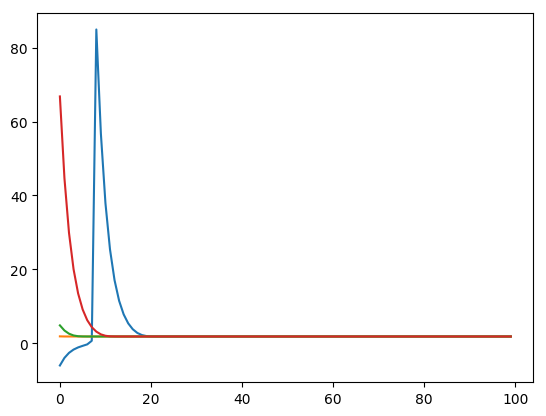

In [7]:
#Usamos plot para graficar los puntos de las listas correspondientes. Usamos real() para evitar problemas con el dominio.
plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
show();

Revisamos que todas las raices converjan al mismo valor.

In [8]:
# Revisamos que el centésimo valor de la list1 coincida con el centésimo valor de la list2
list1[100]==list2[100] 

true

In [9]:
# Revisamos que el centésimo valor de la list2 coincida con el centésimo valor de la list3
list2[100]==list3[100]

true

In [10]:
# Revisamos que el centésimo valor de la list3 coincida con el centésimo valor de la list4
list3[100]==list4[100]

true

Entonces tomamos el valor al que convergen para utilizarlo al momento de calcular los errores.

In [11]:
s=list1[100]

1.8392868f0 + 0.0f0im

Buscamos los errores

In [12]:
e1=(list1-s)/s;
e2=(list2-s)/s;
e3=(list3-s)/s;
e4=(list4-s)/s;

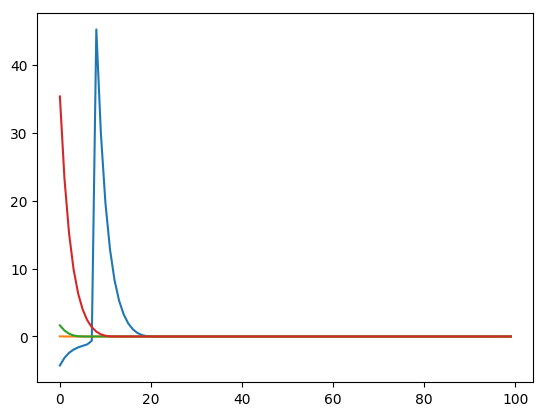

In [21]:
#Usamos plot para graficar los errores. Usamos real para evitar errores de dominio
plot(real(e1))
plot(real(e2))
plot(real(e3))
plot(real(e4))
show();

### b) Método de bisección

Definimos la función que regresa una lista de los valores tomados en la sucesión $p_{k}$ del método de bisección.

In [13]:
 
function biseccion(f,a,b)
    #Definimos nuestro valor inicial de la sucesión
    p=(a+b)/2;
    #Creamos un arreglo de ceros
    list=zeros(Complex64,100);
    #El for es para llegar el centésimo valor de la sucesión
     for i in 1:100
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
        #Vamos guardando cada valor en la respectiva entrada del arreglo list.
        list[i]=p
    end
    #La función regresa una lista con los valores guardados.
    return list
end;

Definimos las listas siguientes tomando diferentes valores iniciales.

In [14]:
list5=biseccion(f,-4,9);
list6=biseccion(f,-14,100);
list7=biseccion(f,-44,69);
list8=biseccion(f,-77,5);

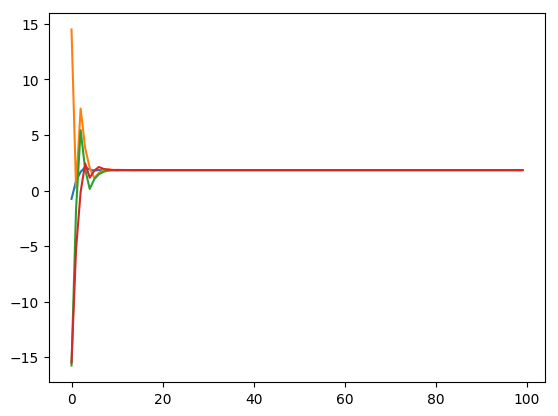

In [15]:
#Usamos plot para graficar los puntos. Usamos real() para evitar problemas con el dominio.
plot(real(list5))
plot(real(list6))
plot(real(list7))
plot(real(list8))
show();

Buscamos los errores.

In [16]:
#Usamos la misma s, ya definida anteriormente, ya que asumimos que esa es la "verdadera" raíz.
e5=(list5-s)/s;
e6=(list6-s)/s;
e7=(list7-s)/s;
e8=(list8-s)/s;

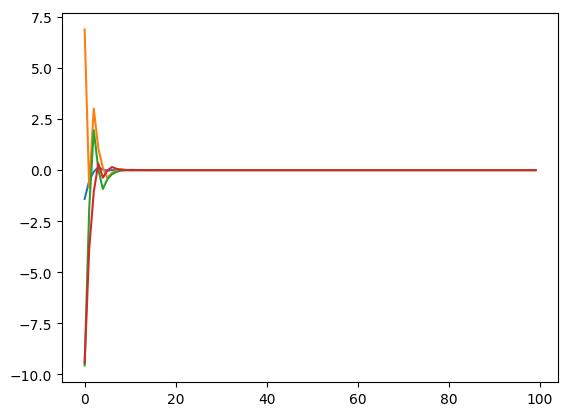

In [17]:
#Usamos plot para graficar los errores. Usamos real para evitar errores de dominio
plot(real(e5))
plot(real(e6))
plot(real(e7))
plot(real(e8))
show();


# 2. Método de Newton para funciones arbitrarias

#### a) Primero veamos la función que toma como argumentos la función, su derivada y una condición inicial; y que regresa una raíz.

In [19]:
function metodo_newton(f,df,x0)
    #Comenzamos tomando nuestra condición inicial
    x=x0;
    #Hacemos el for para aplicar el método de Newton 100 veces
    for i in 1:100
        x=x-f(x)/df(x)
    end
    #La función regresa el último valor de x obtenido
    return x
end;

Ejemplo:

1) Tomamos $g(x)=x^2+4x+3$,
cuya derivada es $\frac{d}{dx}g(x)=2x+4$.
Y cuyas raíces sabemos que son $-1$ y $-3$.

In [20]:
#Definimos g
g(x)=x^2+4x+3;

In [21]:
#definimos dg
dg(x)=2*x+4;

Probamos el método:

In [22]:
metodo_newton(g,dg,5)

-1.0

In [23]:
metodo_newton(g,dg,-100)

-3.0

2) Otro ejemplo. Tomamos $h(x)=sin(x)$, cuya derivada es $\frac{d}{dx}h(x)=cos(x)$

In [24]:
#Definimos h
h(x)=sin(x);

In [25]:
#Definimos la derivada
dh(x)=cos(x);

Probamos el método:

In [26]:
metodo_newton(h,dh,4)

3.141592653589793

In [27]:
metodo_newton(h,dh, 7)

6.283185307179586

#### b) Hacemos la misma función, pero que esta vez tome un rango amplio de condiciones iniciales.

Con el siguiente ejemplo, veamos que, de hecho, basta llamar a la función anterior pero incluyendo un punto (`metodo_newton.(f,df,x)`) para indicarle a Julia que la última entrada es un arreglo y no un número.

Para ello definimos el siguiente arreglo

In [28]:
#usamos linspace para tomar el intervalo de -20 a 20 y dividirlo en 100 partes
a=linspace(-20,20,100);

Ahora llamamos a la función, utilizando las mismas g y dg del ejemplo anterior.

In [29]:
#El punto es para indicar que e "a" es un arreglo y no un número
metodo_newton.(g,dg,a)

100-element Array{Float64,1}:
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
  ⋮  
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

Notamos que, en efecto, el _output_ es una arreglo donde las entradas son raíces.

Ahora podemos intentarlo con h.

In [30]:
metodo_newton.(h,dh,a)

100-element Array{Float64,1}:
  -18.8496
  -18.8496
  -18.8496
  -18.8496
  -18.8496
  -18.8496
  -21.9911
 -103.673 
  -15.708 
  -15.708 
  -15.708 
  -15.708 
  -15.708 
    ⋮     
   15.708 
   15.708 
   15.708 
   15.708 
  103.673 
   21.9911
   18.8496
   18.8496
   18.8496
   18.8496
   18.8496
   18.8496

#### c) Creamos la misma rutina, pero que esta vez solo reciba objetos _linspace_. Y que además solo regrese raíces distintas.

In [31]:
function metodo_n(f,df,lin)
#Definimos dos arreglos vacíos y nuestro error e
    t=[];
    s=[];
    e=(10.0)^(-8)
    
#El primer for es para ir tomando cada entrada del argumento lin
    for j in 1:length(lin)
#Tomamos nuestro valor inicial
        x=lin[j];
#El segundo for es para aplicar el método de Newton 200 veces.
        for i in 1:200
        x=x-f(x)/df(x)
        end
#Vamos guardando los valores de las raíces en el arreglo t
        push!(t,x)
    end


#Tomamos la el primer elemento de t (una de las raícez) y lo guardamos en s  
    push!(s,t[1])
    
#Hacemos un for para ir tomando elementos de t a partir del segundo
    for i in 2:length(t)
#Definimos z con un valor inicial de cero
        z=0;
#Hacemos un segundo for para ir comparando el elemento t[i] con todos los de s
       for j in 1:length(s)
#Cada que la diferencia sea mayor al error, sumamos 1 al valor de z
            if abs(t[i]-s[j])>e
                z=z+1
            end
        end
#Al final, si z es igual a la longitud de s, significa que las diferencias siempre fueron mayores que e, por lo cual el valor de t[i] que estamos comparando es una raíz diferente. Entonces, guardamos dicho valor en el arreglo s.
        if z==length(s)
            push!(s,t[i])
        end
        
    end
#La función regresa s, el arreglo obtenido, donde sólo hay raíces diferentes.
       return s
end;

Ejemplo: 

1) Utilizamos las mismas g y dg.

In [32]:
metodo_n(g,dg,a)

2-element Array{Any,1}:
 -3.0
 -1.0

Notamos que, en efecto, nos regresa las únicas dos raíces, sin repetir.

2) Ahora utilizamos las mismas h y dh.

In [33]:
metodo_n(h,dh,a)

21-element Array{Any,1}:
  -18.8496 
  -21.9911 
 -103.673  
  -15.708  
   -9.42478
  -12.5664 
   -6.28319
  -47.1239 
  -31.4159 
    9.42478
   -3.14159
    0.0    
    6.28319
    3.14159
   31.4159 
   47.1239 
   18.8496 
   12.5664 
   15.708  
  103.673  
   21.9911 

Notamos que nos regresa varias raíces de la función $sin(x)$, todas ellas diferentes.

#### d) Función similar, donde los _inputs_ solo sean la función y la condición inicial.

In [34]:
#Agregamos la librería SymPy
Pkg.add("SymPy");

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [35]:
#Declaramos su uso
using SymPy;

Ahora definimos la función `newton_r(f,x0)`, la cual tome como argumentos únicamente una función dada y una condición inicial.

In [39]:
function newton_r(f,x0)
   #Declaramos la variable simbólica z
    z=symbols("z");
    #Definimos la función derivada. Esta será un función "simbólica"
    dfs=diff(f(z),z);
    #Usamos lambdify para transformar la función anterior a una función de Julia
    df=lambdify(dfs,[z]);
 #Tomamos nuestra condición inicial
    x=x0;
    #Hacemos el for para aplicar el método de Newton 200 veces
    for i in 1:200
        x=x-f(x)/df(x)
    end
    #La función regresa el último valor de x obtenido
    
    return x
end;

Ahora probamos que la función funcione.

Probamos con la $g$ de los ejemplos anteriores.

In [40]:
newton_r(g,5)

-1.0

Probamos con la $h$.

In [43]:
newton_r(h,19)

18.84955592153876

Finalmente, veamos que podemos meter como condición inicial una lista, en lugar de un sólo número únicamente agregando un punto. Es decir, `newton_r.(f,list)`.

Probamos con $h$ y con la lista $a$ de los ejemplos anteriores.

In [44]:
newton_r.(h,a)

100-element Array{Float64,1}:
  -18.8496
  -18.8496
  -18.8496
  -18.8496
  -18.8496
  -18.8496
  -21.9911
 -103.673 
  -15.708 
  -15.708 
  -15.708 
  -15.708 
  -15.708 
    ⋮     
   15.708 
   15.708 
   15.708 
   15.708 
  103.673 
   21.9911
   18.8496
   18.8496
   18.8496
   18.8496
   18.8496
   18.8496

De hecho, podemos utilizar el mismo código del inciso anterior (con los respectivos cambios), para asegurar que la función solo nos devuelva raíces distintas.

In [45]:
function newton_root(f,lin)
     #Declaramos la variable simbólica z
    z=symbols("z");
    #Definimos la función derivada. Esta será un función "simbólica"
    dfs=diff(f(z),z);
    #Usamos lambdify para transformar la función anterior a una función de Julia
    df=lambdify(dfs,[z]);
#Definimos dos arreglos vacíos y nuestro error e
    t=[];
    s=[];
    e=(10.0)^(-8);
    
#El primer for es para ir tomando cada entrada del argumento lin
    for j in 1:length(lin)
#Tomamos nuestro valor inicial
        x=lin[j];
#El segundo for es para aplicar el método de Newton 200 veces.
        for i in 1:200
        x=x-f(x)/df(x)
        end
#Vamos guardando los valores de las raíces en el arreglo t
        push!(t,x)
    end


#Tomamos la el primer elemento de t (una de las raícez) y lo guardamos en s  
    push!(s,t[1])
    
#Hacemos un for para ir tomando elementos de t a partir del segundo
    for i in 2:length(t)
#Definimos z con un valor inicial de cero
        z=0;
#Hacemos un segundo for para ir comparando el elemento t[i] con todos los de s
       for j in 1:length(s)
#Cada que la diferencia sea mayor al error, sumamos 1 al valor de z
            if abs(t[i]-s[j])>e
                z=z+1
            end
        end
#Al final, si z es igual a la longitud de s, significa que las diferencias siempre fueron mayores que e, por lo cual el valor de t[i] que estamos comparando es una raíz diferente. Entonces, guardamos dicho valor en el arreglo s.
        if z==length(s)
            push!(s,t[i])
        end
        
    end
#La función regresa s, el arreglo obtenido, donde sólo hay raíces diferentes.
       return s
end;

Ejemplos:

Con $g$

In [46]:
newton_root(g,a)

2-element Array{Any,1}:
 -3.0
 -1.0

Con h

In [47]:
newton_root(h,a)

21-element Array{Any,1}:
  -18.8496 
  -21.9911 
 -103.673  
  -15.708  
   -9.42478
  -12.5664 
   -6.28319
  -47.1239 
  -31.4159 
    9.42478
   -3.14159
    0.0    
    6.28319
    3.14159
   31.4159 
   47.1239 
   18.8496 
   12.5664 
   15.708  
  103.673  
   21.9911 

Vemos que los resultados son iguales a los obtenidos en el incisio anterior.